In [80]:
# Import packages and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

# Set seed and test proportion
seed = 123

marijuana = pd.read_csv('https://raw.githubusercontent.com/mh2t/DS5110/main/data/gss.csv').dropna()

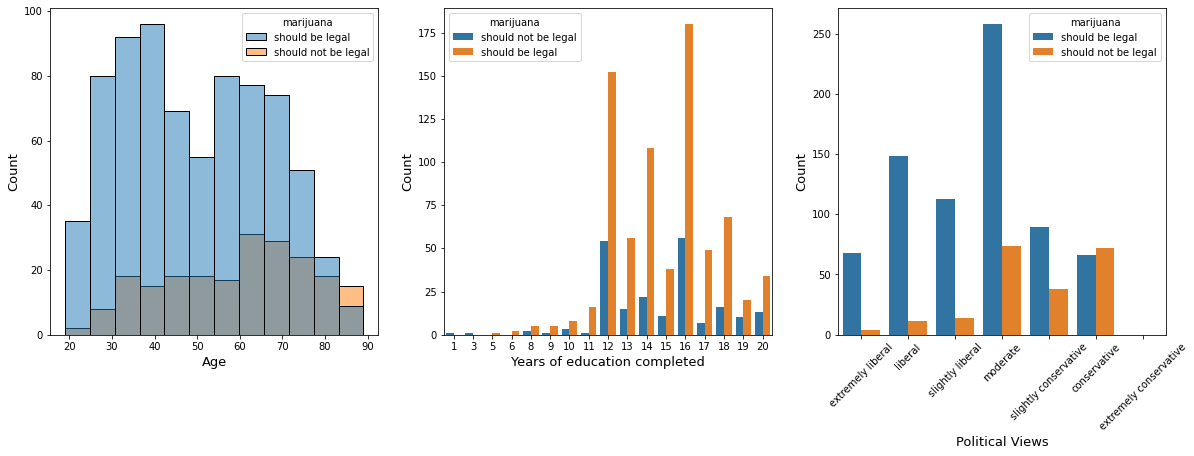

In [34]:
# Plot all three features
plt.rcParams["figure.figsize"] = (20, 6)

plt.subplot(1, 3, 1)

sns.histplot(data=marijuana, x='age', hue='marijuana')
plt.xlabel("Age", fontsize=13)
plt.ylabel("Count", fontsize=13)

plt.subplot(1, 3, 2)

sns.countplot(data=marijuana, x='educ', hue='marijuana')
plt.xlabel("Years of education completed", fontsize=13)
plt.ylabel("Count", fontsize=13)

plt.subplot(1, 3, 3)

sns.countplot(data=marijuana, x='polviews', hue='marijuana', order=['extremely liberal', 'liberal', 'slightly liberal', 'moderate', 'slightly conservative', 'conservative', 'extremely conservative'])
plt.xlabel("Political Views", fontsize=13)
plt.ylabel("Count", fontsize=13)
plt.xticks(rotation=45)

plt.show()

In [35]:
# Define input and output features
X = marijuana[['age', 'educ', 'polviews_num']]
y = marijuana[['marijuana01']]

In [42]:
# Initialize and fit the model
clf = DecisionTreeClassifier(random_state=0, max_depth=2)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=0)

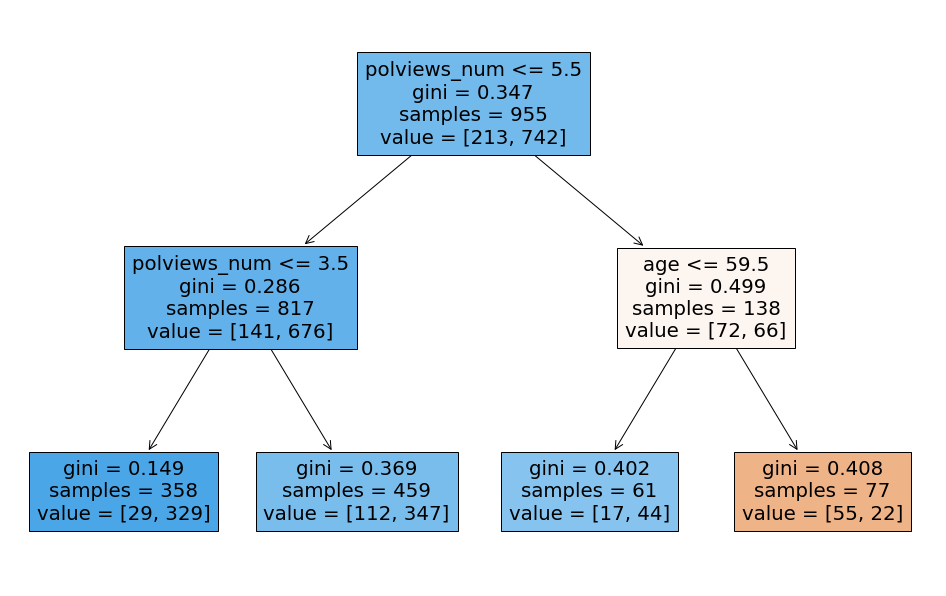

In [58]:
# Resize the plotting window
fig = plt.figure(figsize=(16.7, 10.7))
tree.plot_tree(clf, feature_names=['age', 'educ', 'polviews_num'], filled=True)
plt.show()

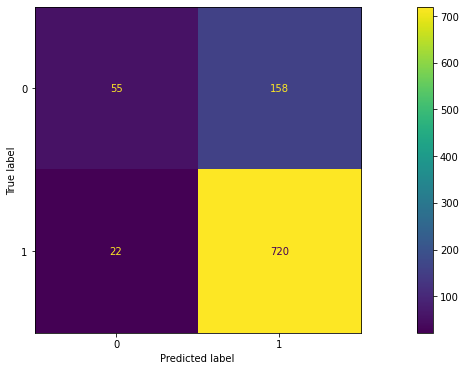

In [60]:
# Confusion matrix
predictions = clf.predict(X)
cm = confusion_matrix(y, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [61]:
# Initialize and fit the model
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=0)

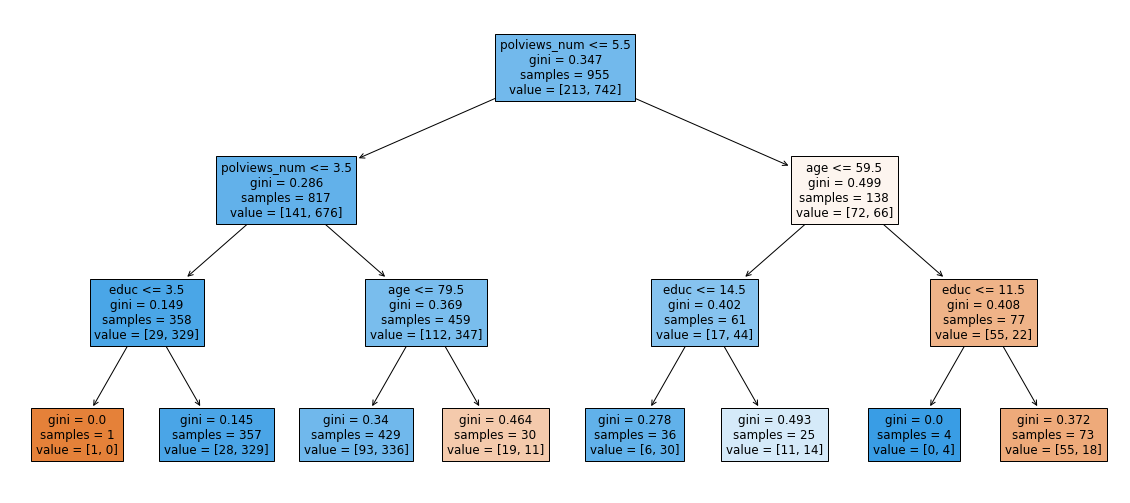

In [78]:
# Resize the plotting window
fig = plt.figure(figsize=(20, 9))
tree.plot_tree(clf, feature_names=['age', 'educ', 'polviews_num'], filled=True)
plt.show()

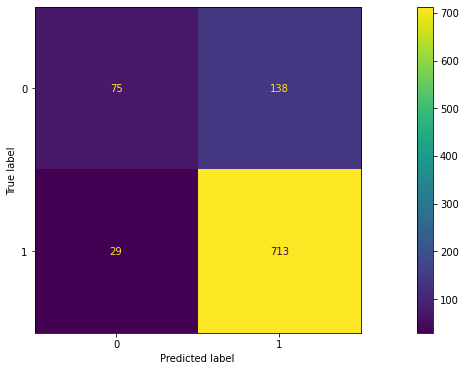

In [79]:
# Confusion matrix
predictions = clf.predict(X)
cm = confusion_matrix(y, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [81]:
# Initialize and fit the model
clf = RandomForestClassifier(max_depth=2, max_features=2, random_state=123)
clf.fit(X, y)

c:\Users\rtoth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=2, max_features=2, random_state=123)

In [92]:
# Feature importance
feature = ['age', 'educ', 'polviews_num']
importance = clf.feature_importances_
feature_importance = pd.DataFrame({'feature':feature, 'importance':importance})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
feature_importance

,feature,importance
2,polviews_num,0.581462
0,age,0.387531
1,educ,0.031008


C:\Users\rtoth\AppData\Local\Temp\ipykernel_8600\3585039400.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  bp.set_xticklabels(['Political views', 'Age', 'Education'])


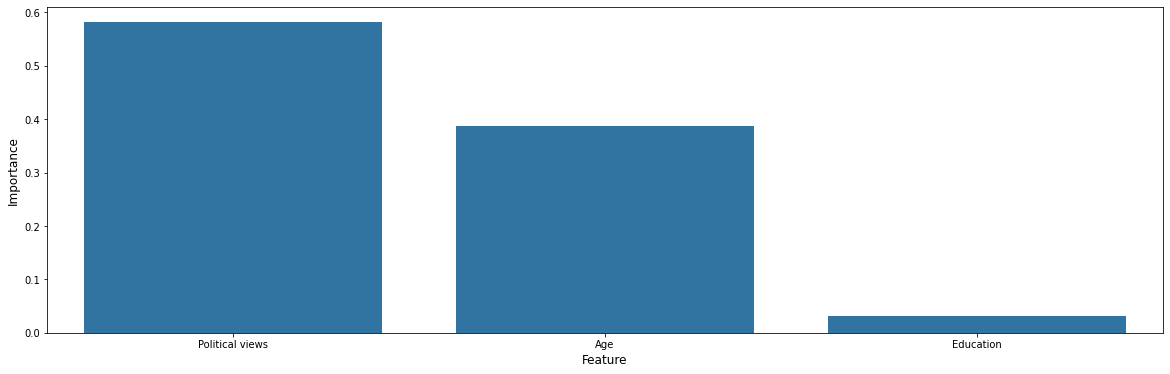

In [106]:
# Plot feature importance
bp = sns.barplot(data=feature_importance, x='feature', y='importance')
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Importance', fontsize=12)
bp.set_xticklabels(['Political views', 'Age', 'Education'])
plt.show()

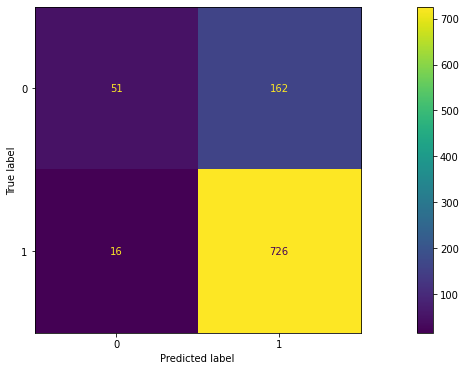

In [107]:
# Confusion matrix
predictions = clf.predict(X)
cm = confusion_matrix(y, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()